<a href="https://colab.research.google.com/github/dssp-ethz/DSSP-Illustrations/blob/main/Sampling_Theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sampling Theorem

## Problem 2.6 (as of 2020)

Let $F(i2\pi f) = \begin{cases} 1 - |f|/f_0 & |f| < f_0\\ 0 & \text{otherwise}\end{cases}$

Sketch the spectrum $F_s(e^{i \Omega})$ of the sampled signal $f_s [k] = T f(kT)$ for 

1.   $T = 1/(2f_0) \ \iff f_s = 2 f_0$
2.   $T = 1/(\frac{3}{2}f_0) \iff f_s = \frac{3}{2} f_0$
3.   $T = 1/(f_0) \ \ \ \iff f_s = f_0$

$Y_s(z) = \sum\limits_{s\in\mathbb{C} : e^{sT} = z} Y(s) \qquad$ (2.48 in lecture notes)




In [1]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#-------------------------------------------------------------------------------

#read in parameters
f_0G = 10
f_sG = 1.5
logPlotG = False
def update_parameters(f_0, f_s, logPlot):
  global f_0G, f_sG, logPlotG
  f_0G, f_sG, logPlotG = f_0, f_s * f_0, logPlot #multiples of f_0
widgets.interact(update_parameters, f_0 = widgets.IntSlider(min=1, max=20, value=10), 
                 f_s = widgets.FloatSlider(min=1, max=2.5, value=1.5),
                 logPlot = widgets.Checkbox(value=False, description='logarithmic plot'))

#Important Stuff
################################################################################
#example spectrum, unless specified f_0 is at 10 Hz
def F(f, f_0):
  if abs(f) > f_0:
    return 0
  else:
    return 1 - np.abs(f)/f_0

def F_s(Omega, f_s, f_0):
  f = Omega*f_s/(2*np.pi)
  s = 0
  #F_s(Omega) = sum_{n\in Z} F(i*(Omega+n*2pi))
  for n in range(-20, 20):#only some of the frequency spectrum will be summed over for computational reasons
    s += F(f+n*f_s, f_0)
  return s

#example signal in time domain
def f(t, f_0):
  return f_0*np.sinc(f_0*t)**2 #IFT of F

#reconstructed signal (with potential aliasing) in time domain
def f_r(t, f_0, f_s):
  s = 0
  for k in range(-20, 20):#only some of the samples will be summed over for computational reasons
    s += f(k/f_s, f_0)*np.sinc(t*f_s-k)
  return s
################################################################################

#range to display
f_values = np.linspace(-2*f_0G,2*f_0G,100)
Omega_values = np.linspace(-3*np.pi, 3*np.pi, 100)
t_values = np.linspace(-0.7, 0.7, 150)**3

#drawing plots
def plot():
  y_values = [F(f, f_0G) for f in f_values]
  y2_values = [F_s(Omega, f_sG, f_0G) for Omega in Omega_values]

  fig = plt.figure(figsize=(20, 8))

  ax1 = fig.add_subplot(1, 2, 1)
  ax1.grid()
  ax1.set_xlabel('$f$', fontsize=14)
  ax1.set_ylabel('$F(2\pi\ i\ f)$', fontsize=14)
  if logPlotG == False:
    ax1.axis(xmin=f_values[0], xmax=f_values[-1], ymin=0, ymax=1.5)
    ax1.plot(f_values, y_values, alpha=0.5, marker='o', markersize=8);
  else:
    ax1.axis(xmin=f_values[0], xmax=f_values[-1], ymin=0.1, ymax=1.5)
    ax1.semilogy(f_values, y_values, alpha=0.5, marker='o', markersize=8);

  ax2 = fig.add_subplot(1, 2, 2)
  ax2.grid()
  ax2.set_xlabel('$\Omega$', fontsize=14)
  ax2.set_ylabel('$F_s(e^{i\Omega})$', fontsize=14)
  if logPlotG == False:
    ax2.axis(xmin=Omega_values[0], xmax=Omega_values[-1], ymin=0, ymax=1.5)
    ax2.plot(Omega_values, y2_values, alpha=0.5, marker='o', markersize=8);
  else:
    ax2.axis(xmin=Omega_values[0], xmax=Omega_values[-1], ymin=0.1, ymax=1.5)
    ax2.semilogy(Omega_values, y2_values, alpha=0.5, marker='o', markersize=8);

def plot_time():
  y_values = [f(t, f_0G) for t in t_values]
  y2_values = [f_r(t, f_0G, f_sG) for t in t_values]

  fig = plt.figure(figsize=(20, 8))

  ax1 = fig.add_subplot(1, 2, 1)
  ax1.grid()
  ax1.set_xlabel('$t$', fontsize=14)
  ax1.set_ylabel('$f(t)$', fontsize=14)
  ax1.axis(xmin=t_values[0], xmax=t_values[-1])
  if logPlotG == False:
    ax1.plot(t_values, y_values, alpha=0.5, marker='o', markersize=8);
  else:
    ax1.semilogy(t_values, y_values, alpha=0.5, marker='o', markersize=8);

  ax2 = fig.add_subplot(1, 2, 2)
  ax2.grid()
  ax2.set_xlabel('$t$', fontsize=14)
  ax2.set_ylabel('$f_s(t)$', fontsize=14)
  ax2.axis(xmin=t_values[0], xmax=t_values[-1])
  if logPlotG == False:
    ax2.plot(t_values, y2_values, alpha=0.5, marker='o', markersize=8);
  else:
    ax2.semilogy(t_values, y2_values, alpha=0.5, marker='o', markersize=8);

interactive(children=(IntSlider(value=10, description='f_0', max=20, min=1), FloatSlider(value=1.5, descriptio…

$f_0$ can be set in Hertz while $f_s$ is a multiple of $f_0$ (also set with slider).

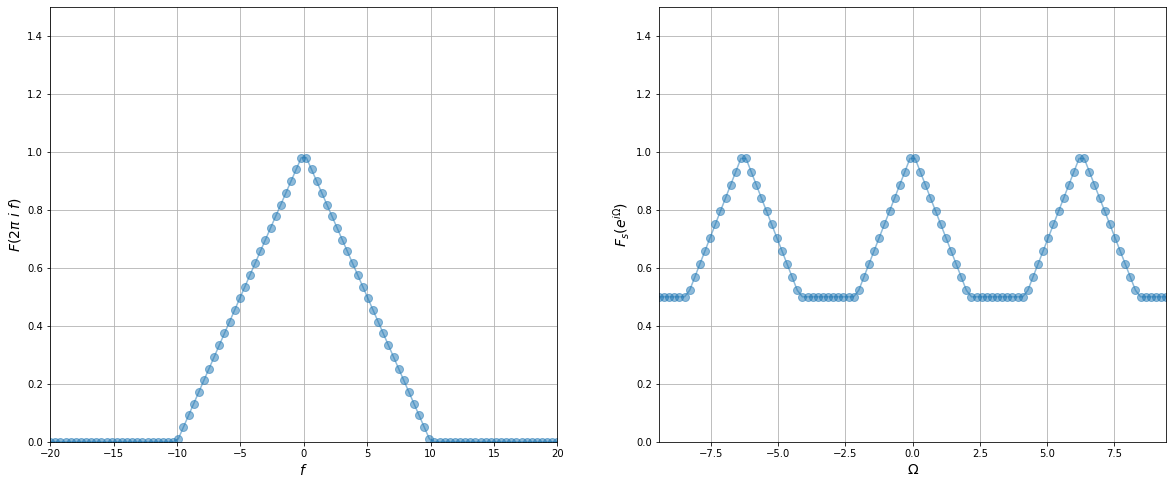

In [2]:
plot()

Having seen the effect on the spectrum you may wonder how the time domain changes if aliasing occurs. You might only see subtle changes in this waveform (try the extreme $f_s = 1\cdot f_0$).

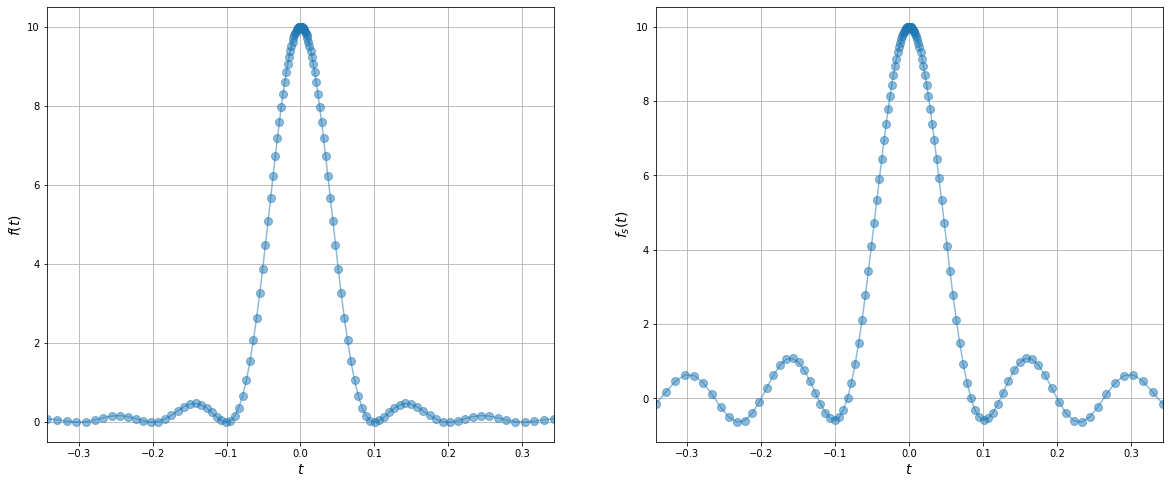

In [3]:
plot_time()

## Further sampling of signals



The signals in problem 2.6 are fairly ideal. The following code snippet allows a more varied selection of signals that can be sampled at different frequencies.

In [4]:
!gdown https://drive.google.com/uc?id=1YGTiOKi68B272QCidHaQ_ArzPPtb-Bj5
!gdown https://drive.google.com/uc?id=1-nxgfNaJPeB88X_kE5T2xDqiGI5T2I1u

Downloading...
From: https://drive.google.com/uc?id=1YGTiOKi68B272QCidHaQ_ArzPPtb-Bj5
To: /content/continuous_time_fourier_transform.py
100% 1.05k/1.05k [00:00<00:00, 2.06MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-nxgfNaJPeB88X_kE5T2xDqiGI5T2I1u
To: /content/signals.py
100% 5.55k/5.55k [00:00<00:00, 9.94MB/s]


In [5]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import signals
import continuous_time_fourier_transform
#-------------------------------------------------------------------------------

#read in parameters
f_sG = 1.5
logPlotG = False
def update_parameters2(f_s, logPlot):
  global f_sG, logPlotG
  f_sG, logPlotG = f_s, logPlot
widgets.interact(update_parameters2, f_s = widgets.FloatSlider(min=1, max=50, value=1.5, description = 'f_s [Hz]'),
                 logPlot = widgets.Checkbox(value=False, description='logarithmic plot'))

#Important Stuff
################################################################################

def sampled_spectrum(spectrum, f_s, w):
  val = 0
  for n in range(-50, 50): #finite sum allows computation, in theory would be over all integers
    val += continuous_time_fourier_transform.evaluate_spectrum(spectrum, w + 2 * np.pi * n * f_s)
  return val

def sampled_time(spectrum, f_s, t_0):
  f_hat = lambda w: sampled_spectrum(spectrum, f_s, w)
  #\hat{\hat{f}}(t) = 2 * pi * f(-t) //fourier transform in w, not in f
  t_values, f_values = continuous_time_fourier_transform.fourier_transform(f_hat, t_0)
  f_values = f_values / (2*np.pi)
  t_values = - np.real(t_values)
  return (t_values, f_values)

def reconstructed_spectrum(spectrum, f_s, w):
  return sampled_spectrum(spectrum, f_s, w) if np.abs(w) < np.pi*f_s else 0

def reconstructed_time(spectrum, f_s, t_0):
  f_hat = lambda w: reconstructed_spectrum(spectrum, f_s, w)
  #\hat{\hat{f}}(t) = 2 * pi * f(-t) //fourier transform in w, not in f
  t_values, f_values = continuous_time_fourier_transform.fourier_transform(f_hat, t_0)
  f_values = f_values / (2*np.pi)
  t_values = - np.real(t_values)
  return (t_values, f_values)

################################################################################

#range to display (for plotting purposes), must be symmetric around 0 for "continuous_time_fourier_transform" to work
t_values = np.arange(-5, 5, 0.01)

def plot_original():
  #time domain
  u_values = [signals.time_domain_signal_continuous()(t) for t in t_values]

  fig = plt.figure(figsize=(20, 8))
  ax1 = fig.add_subplot(1, 2, 1)
  ax1.grid()
  ax1.set_xlabel('$t$', fontsize=14)
  ax1.set_ylabel('$u(t)$', fontsize=14)
  ax1.axis(xmin=t_values[0], xmax=t_values[-1])
  if logPlotG == False:
    ax1.axis(ymin=-3, ymax=3)
    ax1.plot(t_values, u_values, alpha=0.5);
  else:
    ax1.axis(ymin=0.1, ymax=3)
    ax1.semilogy(t_values, u_values, alpha=0.5);

  #frequency domain
  w_values, u_hat_values = continuous_time_fourier_transform.fourier_transform(signals.time_domain_signal_continuous(), t_values[0])
  f_values = w_values / (2*np.pi)

  fig = plt.figure(figsize=(20, 8))
  ax2 = fig.add_subplot(1, 2, 2)
  ax2.grid()
  ax2.set_xlabel('$f$', fontsize=14)
  ax2.set_ylabel('$\hat{u}(f)$', fontsize=14)
  ax2.axis(xmin=np.min(f_values), xmax=np.max(f_values))
  if logPlotG == False:
    ax2.axis(ymin=-3, ymax=3)
    ax2.plot(f_values[::5], np.abs(u_hat_values)[::5], alpha=0.5);
    ax2.plot(f_values[::5], np.angle(u_hat_values)[::5], alpha=0.5);
  else:
    ax2.axis(ymin=0.1, ymax=3)
    ax2.semilogy(f_values[::5], np.abs(u_hat_values)[::5], alpha=0.5);
    ax2.semilogy(f_values[::5], np.angle(u_hat_values)[::5], alpha=0.5);

  ax2.legend(['$|\hat{u}|$', '$\phi\ \hat{u}$'])

def plot_sampled():
  #frequency domain
  w_values, u_hat_values = continuous_time_fourier_transform.fourier_transform(signals.time_domain_signal_continuous(), t_values[0])
  #introduce sampling:
  u_hat_values = [sampled_spectrum((w_values, u_hat_values), f_sG, w) for w in w_values]

  f_values = w_values / (2*np.pi)

  #time domain
  s_t = sampled_time((w_values, u_hat_values), f_sG, t_values[0])
  #u_values = [continuous_time_fourier_transform.evaluate_spectrum(s_t, t) for t in t_values] #actually evaluates time, but same function call
  fig = plt.figure(figsize=(20, 8))
  ax1 = fig.add_subplot(1, 2, 1)
  ax1.grid()
  ax1.set_xlabel('$t$', fontsize=14)
  ax1.set_ylabel('$u_s(t)$', fontsize=14)
  ax1.axis(xmin=t_values[0], xmax=t_values[-1])
  if logPlotG == False:
    ax1.axis(ymin=-3, ymax=3)
    ax1.plot(s_t[0], s_t[1], alpha=0.5);
  else:
    ax1.axis(ymin=0.1, ymax=3)
    ax1.semilogy(s_t[0], s_t[1], alpha=0.5);

  fig = plt.figure(figsize=(20, 8))
  ax2 = fig.add_subplot(1, 2, 2)
  ax2.grid()
  ax2.set_xlabel('$f$', fontsize=14)
  ax2.set_ylabel('$\hat{u_s}(f)$', fontsize=14)
  ax2.axis(xmin=np.min(f_values), xmax=np.max(f_values))
  if logPlotG == False:
    ax2.axis(ymin=-3, ymax=3)
    ax2.plot(f_values[::5], np.abs(u_hat_values)[::5], alpha=0.5);
    ax2.plot(f_values[::5], np.angle(u_hat_values)[::5], alpha=0.5);
  else:
    ax2.axis(ymin=0.1, ymax=3)
    ax2.semilogy(f_values[::5], np.abs(u_hat_values)[::5], alpha=0.5);
    ax2.semilogy(f_values[::5], np.angle(u_hat_values)[::5], alpha=0.5);

  ax2.legend(['$|\hat{u_s}|$', '$\phi\ \hat{u_s}$'])


def plot_reconstructed():
  #frequency domain
  w_values, u_hat_values = continuous_time_fourier_transform.fourier_transform(signals.time_domain_signal_continuous(), t_values[0])
  #introduce sampling:
  u_hat_values = [reconstructed_spectrum((w_values, u_hat_values), f_sG, w) for w in w_values]

  f_values = w_values / (2*np.pi)

  #time domain
  s_t = reconstructed_time((w_values, u_hat_values), f_sG, t_values[0])
  #u_values = [continuous_time_fourier_transform.evaluate_spectrum(s_t, t) for t in t_values]
  fig = plt.figure(figsize=(20, 8))
  ax1 = fig.add_subplot(1, 2, 1)
  ax1.grid()
  ax1.set_xlabel('$t$', fontsize=14)
  ax1.set_ylabel('$u_r(t)$', fontsize=14)
  ax1.axis(xmin=t_values[0], xmax=t_values[-1])
  if logPlotG == False:
    ax1.axis(ymin=-3, ymax=3)
    ax1.plot(s_t[0], s_t[1], alpha=0.5);
  else:
    ax1.axis(ymin=0.1, ymax=3)
    ax1.semilogy(s_t[0], s_t[1], alpha=0.5);

  fig = plt.figure(figsize=(20, 8))
  ax2 = fig.add_subplot(1, 2, 2)
  ax2.grid()
  ax2.set_xlabel('$f$', fontsize=14)
  ax2.set_ylabel('$\hat{u_r}(f)$', fontsize=14)
  ax2.axis(xmin=np.min(f_values), xmax=np.max(f_values))
  if logPlotG == False:
    ax2.axis(ymin=-3, ymax=3)
    ax2.plot(f_values[::5], np.abs(u_hat_values)[::5], alpha=0.5);
    ax2.plot(f_values[::5], np.angle(u_hat_values)[::5], alpha=0.5);
  else:
    ax2.axis(ymin=0.1, ymax=3)
    ax2.semilogy(f_values[::5], np.abs(u_hat_values)[::5], alpha=0.5);
    ax2.semilogy(f_values[::5], np.angle(u_hat_values)[::5], alpha=0.5);

  ax2.legend(['$|\hat{u_r}|$', '$\phi\ \hat{u_r}$'])

interactive(children=(FloatSlider(value=1.5, description='f_s [Hz]', max=50.0, min=1.0), Checkbox(value=False,…

interactive(children=(Dropdown(description='signal type', options=('unit step', 'unit impulse', 'ramp', 'expon…

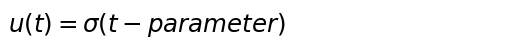

In [7]:
signals.widget()
signals.display_signal_selection(True)

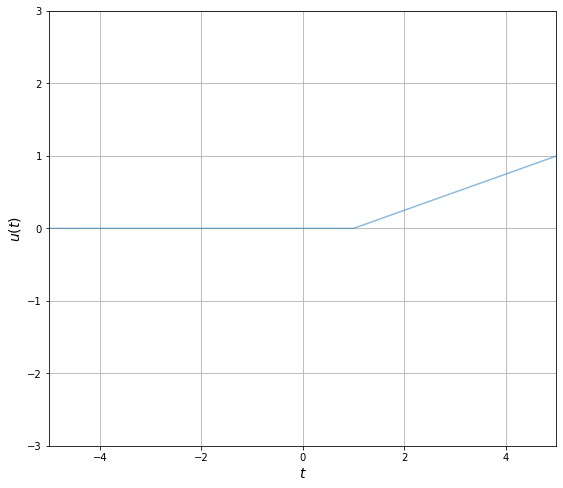

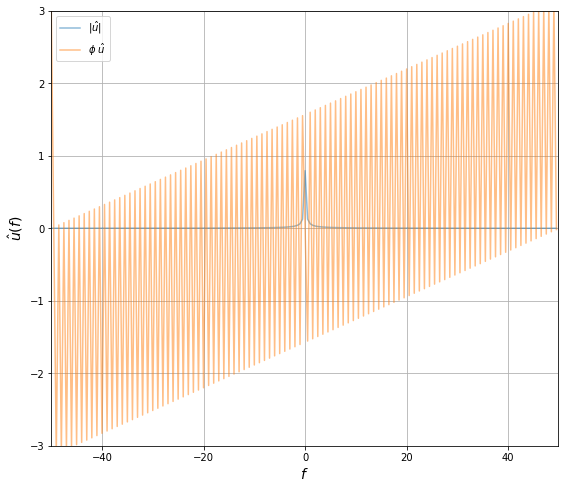

In [10]:
plot_original()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


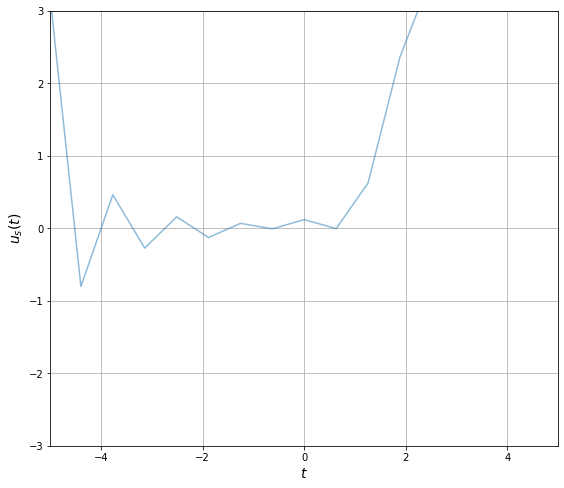

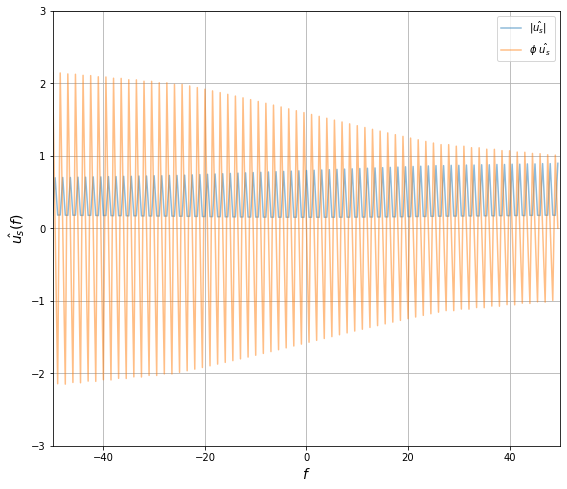

In [11]:
plot_sampled() #real time signal with aliasing introduced

These calculations are somewhat numerically unstable. You will see the nicest results with sinus. Clearly, a large sample rate allows a much more accurate reconstruction.

Now we can lowpass filter the signal to reconstruct it.

In [ ]:
plot_reconstructed()